# Diabetes Dataset
## Predict if a person is at risk of developing diabetes
## Binary Classification - XGBoost

---

## Install *xgboost* into notebook

In [5]:
!conda install -y -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36

  added / updated specs: 
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    grpcio-1.23.0              |   py36h769ab6c_1         1.1 MB  conda-forge
    libxgboost-1.0.2           |       he1b5a44_0         2.8 MB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    libcurl-7.68.0             |       hda55be3_0         564 KB  conda-forge
    curl-7.68.0                |       hf8cf82a_0         137 KB  conda-forge
    pykerberos-1.2.1           |   py36he3c66b5_1          27 KB  conda-forge
    openssl-1.1.1f             |      

In [6]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
column_list_file = 'diabetesTrain_columnList.txt'
train_file = 'diabetesTrain.csv'
validation_file = 'diabetesValidation.csv'

In [8]:
columns = ''
with open(column_list_file,'r') as f:
    columns=f.read().split(',')

In [9]:
columns # display columns

['diabetes_class',
 'preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi',
 'diabetes_pedi',
 'age']

In [11]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [12]:
df_train.head() #data check

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,1,9,165,88,0,0,30.4,0.302,49
1,1,10,111,70,27,0,27.5,0.141,40
2,0,1,100,66,29,196,32.0,0.444,42
3,1,1,125,50,40,167,33.3,0.962,28
4,1,2,146,0,0,0,27.5,0.240,28


In [13]:
df_validation.head() #data check

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,4,112,78,40,0,39.4,0.236,38
1,1,8,155,62,26,495,34.0,0.543,46
2,0,1,131,64,14,415,23.7,0.389,21
3,0,5,86,68,28,71,30.2,0.364,24
4,1,9,140,94,0,0,32.7,0.734,45


In [14]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [15]:
# Launch a classifier
# XGBoost Training Parameter Reference: 
#   https://xgboost.readthedocs.io/en/latest/parameter.html
classifier = xgb.XGBClassifier (objective="binary:logistic",
                                base_score=0.5,
                               booster="gbtree",
                               colsample_bytree=1,
                               learning_rate=0.1,
                                n_estimators=100)

*binary:logistic* represents logisitic regression for binary classification, output probability

In [16]:
classifier # check variable settings

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=1, gamma=None, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=None,
       min_child_weight=None, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=None, num_parallel_tree=None,
       objective='binary:logistic', random_state=None, reg_alpha=None,
       reg_lambda=None, scale_pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None)

In [42]:
classifier.fit(X_train,
              y_train,
              eval_set = [(X_train, y_train), (X_validation, y_validation)],
              eval_metric=['logloss'],
              early_stopping_rounds=15)

[0]	validation_0-logloss:0.63931	validation_1-logloss:0.66551
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-logloss:0.59455	validation_1-logloss:0.64290
[2]	validation_0-logloss:0.55539	validation_1-logloss:0.62737
[3]	validation_0-logloss:0.52227	validation_1-logloss:0.61445
[4]	validation_0-logloss:0.49426	validation_1-logloss:0.60189
[5]	validation_0-logloss:0.46694	validation_1-logloss:0.59069
[6]	validation_0-logloss:0.44185	validation_1-logloss:0.58211
[7]	validation_0-logloss:0.42141	validation_1-logloss:0.57543
[8]	validation_0-logloss:0.40217	validation_1-logloss:0.56988
[9]	validation_0-logloss:0.38571	validation_1-logloss:0.56912
[10]	validation_0-logloss:0.37101	validation_1-logloss:0.56361
[11]	validation_0-logloss:0.35710	validation_1-logloss:0.56203
[12]	validation_0-logloss:0.34367	validation_1-logloss:0.56026
[13]	validation_0-logloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [43]:
eval_result = classifier.evals_result()

In [44]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

In [45]:
print(training_rounds)

range(0, 28)


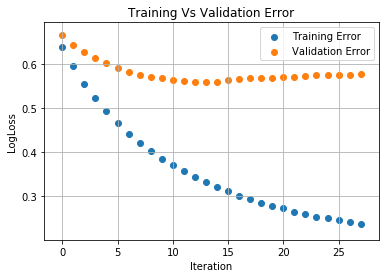

In [46]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

The model is showing issue with generalization.

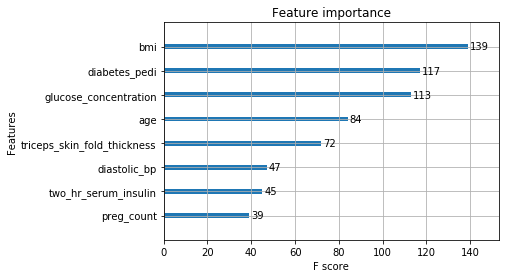

In [47]:
xgb.plot_importance(classifier)
plt.show()

In [48]:
df = pd.read_csv(validation_file,names=columns)

In [49]:
df.head() # data check

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0,4,112,78,40,0,39.4,0.236,38
1,1,8,155,62,26,495,34.0,0.543,46
2,0,1,131,64,14,415,23.7,0.389,21
3,0,5,86,68,28,71,30.2,0.364,24
4,1,9,140,94,0,0,32.7,0.734,45


In [50]:
X_test = df.iloc[:,1:]

In [51]:
result = classifier.predict(X_test)

In [52]:
result[:5]

array([0, 1, 0, 0, 1])

In [53]:
df['predicted_class'] = result

In [54]:
df.head() # data check

,diabetes_class,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,predicted_class
0,0,4,112,78,40,0,39.4,0.236,38,0
1,1,8,155,62,26,495,34.0,0.543,46,1
2,0,1,131,64,14,415,23.7,0.389,21,0
3,0,5,86,68,28,71,30.2,0.364,24,0
4,1,9,140,94,0,0,32.7,0.734,45,1


## Binary Classifier Metrics

### Using scikit-learn model evaluation
[model evaluation reference](https://scikit-learn.org/stable/modules/model_evaluation.html)

Create the definitions for confusion matrix: true positive, true positive, false positive, false negative

In [55]:
def true_positive(y_true, y_pred):
    return confusion_matrix(y_true, y_pred,
                           labels=[1,0])[0,0]
def true_negative(y_true, y_pred):
    return confusion_matrix(y_true, y_pred,
                           labels=[1,0])[1,1]
def false_positive(y_true, y_pred):
    return confusion_matrix(y_true, y_pred,
                           labels=[1,0])[1,0]
def false_negative(y_true, y_pred):
    return confusion_matrix(y_true, y_pred,
                           labels=[1,0])[0,1]

### Compute Binary Classifier Metrics

The output of the [binary classification algorithms](https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html) results in a prediction score.

"Binary classification accuracy metrics quantify the two types of correct predictions and two types of errors. Typical metrics are accuracy (ACC), precision, recall, false positive rate, F1-measure. Each metric measures a different aspect of the predictive model. Accuracy (ACC) measures the fraction of correct predictions. Precision measures the fraction of actual positives among those examples that are predicted as positive. Recall measures how many actual positives were predicted as positive. F1-measure is the harmonic mean of precision and recall." - *Amazon Machine Learning* documentation

### Return a dictionary {"MetricName":Value, ...}

In [56]:
def binary_classifier_metrics(y_true,y_pred):
    metrics = {} # initialize empty dictionary
        # References: 
    #  https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
        # Definition:
    # true positive = tp = how many samples were correctly classified as positive (count)
    # true negative = tn = how many samples were correctly classified as negative (count)
    # false positive = fp = how many negative samples were mis-classified as positive (count)
    # false_negative = fn = how many positive samples were mis-classified as negative (count)
    
    # positive = number of positive samples (count)
    #          = true positive + false negative
    # negative = number of negative samples (count)
    #          = true negative + false positive
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    positive = tp + fn
    negative = tn + fp
    
    metrics['TruePositive'] = tp
    metrics['TrueNegative'] = tn
    metrics['FalsePositive'] = fp
    metrics['FalseNegative'] = fn
    
    metrics['Positive'] = positive
    metrics['Negative'] = negative
    
    # True Positive Rate (TPR, Recall) = true positive/positive
    # How many positives were correctly classified? (fraction)
    # Recall value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        recall = 0
    else:
        recall = tp/positive
        
    metrics['Recall'] = recall
    
    # True Negative Rate = True Negative/negative
    # How many negatives were correctly classified? (fraction)
    # True Negative Rate value closer to 1 is better. closer to 0 is worse
    if tn == 0:
        tnr = 0
    else:
        tnr = tn/(negative)
    metrics['TrueNegativeRate'] = tnr
    
    # Precision = True Positive/(True Positive + False Positive)
    # How many positives classified by the algorithm are really positives? (fraction)
    # Precision value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        precision = 0
    else:
        precision = tp/(tp + fp)
    metrics['Precision'] = precision
    
    # Accuracy = (True Positive + True Negative)/(total positive + total negative)
    # How many positives and negatives were correctly classified? (fraction)
    # Accuracy value closer to 1 is better. closer to 0 is worse
    accuracy = (tp + tn)/(positive + negative)
    metrics['Accuracy'] = accuracy
    
    # False Positive Rate (FPR, False Alarm) = False Positive/(total negative)
    # How many negatives were mis-classified as positives (fraction)
    # False Positive Rate value closer to 0 is better. closer to 1 is worse
    if fp == 0:
        fpr = 0
    else:
        fpr = fp/(negative)
    metrics['FalsePositiveRate'] = fpr
    
    # False Negative Rate (FNR, Misses) = False Negative/(total Positive)
    # How many positives were mis-classified as negative (fraction)
    # False Negative Rate value closer to 0 is better. closer to 1 is worse
    fnr = fn/(positive)
    metrics['FalseNegativeRate'] = fnr
    
    # F1 Score = harmonic mean of Precision and Recall
    # F1 Score closer to 1 is better. Closer to 0 is worse.
    if precision == 0 or recall == 0:
        f1 = 0
    else:        
        f1 = 2*precision*recall/(precision+recall)

    metrics['F1'] = f1
    
    return metrics

## Create an scikit-learn Confusion Matrix Plot
[Confusion Matrix Reference](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

In [57]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Compute the Confusion Matrix

In [58]:
cnf_matrix = confusion_matrix(df['diabetes_class'], df['predicted_class'],
                             labels=[1,0])

## Plot

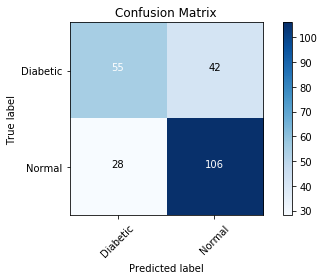

In [59]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Diabetic','Normal'],
                     title='Confusion Matrix')

## Normalized Plot

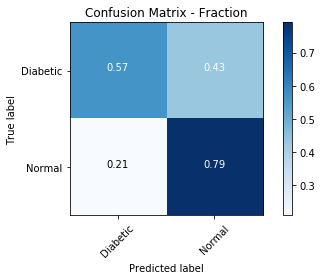

In [60]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Diabetic','Normal'],
                      title='Confusion Matrix - Fraction', normalize=True)

## Build Metrics

In [61]:
metrics = [binary_classifier_metrics(df['diabetes_class'], df['predicted_class'])]
df_metrics=pd.DataFrame.from_dict(metrics)
df_metrics.index = ['Model']

In [62]:
df_metrics # Data check

,Accuracy,F1,FalseNegative,FalseNegativeRate,FalsePositive,FalsePositiveRate,Negative,Positive,Precision,Recall,TrueNegative,TrueNegativeRate,TruePositive
Model,0.69697,0.611111,42,0.43299,28,0.208955,134,97,0.662651,0.56701,106,0.791045,55


### Counts

In [63]:
print('Counts')
print(df_metrics[['TruePositive',
                  'FalseNegative',
                  'FalsePositive',
                  'TrueNegative',]].round(2))
print()
print('Fractions')
print(df_metrics[['Recall',
                  'FalseNegativeRate',
                  'FalsePositiveRate',
                  'TrueNegativeRate',]].round(2))
print()

print(df_metrics[['Precision',
                  'Accuracy',
                  'F1']].round(2))

Counts
       TruePositive  FalseNegative  FalsePositive  TrueNegative
Model            55             42             28           106

Fractions
       Recall  FalseNegativeRate  FalsePositiveRate  TrueNegativeRate
Model    0.57               0.43               0.21              0.79

       Precision  Accuracy    F1
Model       0.66       0.7  0.61


### Classification Report

In [64]:
print(classification_report(
    df['diabetes_class'],
    df['predicted_class'],
    labels=[1,0],
    target_names=['Diabetic','Normal']))

              precision    recall  f1-score   support

    Diabetic       0.66      0.57      0.61        97
      Normal       0.72      0.79      0.75       134

   micro avg       0.70      0.70      0.70       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.69      0.70      0.69       231



#### 